- Проверка 9-ти гипотез по увеличению выручки интернет-магазина по параметрам ICE и RICE
- Проверка результатов А/В-теста

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 150
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
import scipy.stats as stats

# Часть 1. Приоритизация гипотез

Как уже было сказано, гипотезы будем приоритизировать параметрами ICE и RICE, отличаются они учетом охвата аудитории - в ICE охват не учитывается, в RICE учитывается. Так как в дальнейшем исследовании нас больше будет волновать результат всей выборки, а не отдельной группы пользователей, то большее значение мы придадим параметру RICE, но лидирующие гипотезы по параметру ICE тоже примем во внимание.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
#hypothesis.info()
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приоритизируем гипотезы с помощью параметра ICE:

In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
ice = hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
display(ice)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [4]:
print('Лучшая гипотеза по параметру ICE:')
print(ice.loc[8, 'Hypothesis'])

Лучшая гипотеза по параметру ICE:
Запустить акцию, дающую скидку на товар в день рождения


Приоритизируем гипотезы с помощтью параметра RICE:

In [5]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
rice = hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
display(rice)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [6]:
print('Лучшая гипотеза по параметру RICE:')
print(rice.loc[7, 'Hypothesis'])

Лучшая гипотеза по параметру RICE:
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


Восьмая гипотеза с максимальным ICE по параметру RICE находится на 4-м месте, а седьмая гипотеза с максимальным RICE - на 3-м месте по параметру ICE. Удивительного в этом ничего нет, т.к. скидку в день рождения мы предложим на этой неделе только 2% пользователей, а подписаться на e-mail рассылку - всем.

Рекомендуется уделить внимание гипотезам: 7, 2, 0, 6, 8 - эти пять гипотез являются лидерами и по ICE и по RICE, начать следует с 7 гипотезы, ее влияние на бизнес будет иметь отложенный и накопительный эффект, и для ее проверки потребуется больше времени

По одной из гипотез готовы результаты А/В теста. Требуется провести анализ результатов.

# Часть 2. Анализ А/В-теста

Итак, у нас есть датафреймы с информацией о заказах и посещениях магазина с разбивкой на две группы - с исследуемым изменением и без него. Проверим качество данных - пропуски, дубликаты, продолжительность теста, сбалансированность групп по количеству покупателей.

In [7]:
# загрузим дата-сеты и преобразуем даты
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors.info()
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
print('количество дубликатов в таблице заказов:', orders.duplicated().sum())
print('количество дубликатов в таблице визитов:', visitors.duplicated().sum())

количество дубликатов в таблице заказов: 0
количество дубликатов в таблице визитов: 0


Пропусков и дубликатов нет, проверим даты

In [11]:
print('Группа А:')
print('первый покупатель', orders[orders['group'] == 'A']['date'].min(), '- последний покупатель', orders[orders['group'] == 'A']['date'].max())
print('количество посетителей', visitors[visitors['group'] == 'A']['visitors'].sum())
print('количество уникальных покупателей', orders[orders['group'] == 'A']['visitorId'].nunique())
print()
print('Группа B:')
print('первый покупатель', orders[orders['group'] == 'B']['date'].min(), '- последний покупатель', orders[orders['group'] == 'B']['date'].max())
print('количество посетителей', visitors[visitors['group'] == 'B']['visitors'].sum())
print('количество уникальных покупателей', orders[orders['group'] == 'B']['visitorId'].nunique())

Группа А:
первый покупатель 2019-08-01 00:00:00 - последний покупатель 2019-08-31 00:00:00
количество посетителей 18736
количество уникальных покупателей 503

Группа B:
первый покупатель 2019-08-01 00:00:00 - последний покупатель 2019-08-31 00:00:00
количество посетителей 18916
количество уникальных покупателей 586


Тест проводился с 1 августа 2019 по 31 августа 2019, количество посетителей в группах отличается менее чем на 1%

проверим, пересекались покупатели групп или нет

In [12]:
print(orders[orders['group'] == 'A'].merge(orders[orders['group'] == 'B'], on='visitorId', suffixes=('A', 'B')).nunique())

transactionIdA    89
visitorId         58
dateA             27
revenueA          82
groupA             1
transactionIdB    92
dateB             29
revenueB          87
groupB             1
dtype: int64


Около 10% покупателей совершали покупки в двух группах, это достаточно много, в группе А они совершили 89 покупок, в группе В - 92 покупки, сильного перекоса по покупкам нет, поэтому не будем удалять их из исследования.

Подготовим данные для анализа кумулятивных метрик.

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [14]:
# создадим таблицы кумулятивных значений для заказов и посещений
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [15]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [16]:
# датафрейм с кумулятивной выручкой, кумулятивным количеством заказов, покупателей и посетителей по дням в группе А
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'buyers', 'visitors']]

# датафрейм с кумулятивной выручкой, кумулятивным количеством заказов, покупателей и посетителей по дням в группе В
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'buyers', 'visitors']]

In [17]:
display(cumulativeDataA.head())

,date,revenue,orders,buyers,visitors
0,2019-08-01,148579,24,20,719
2,2019-08-02,242401,44,38,1338
4,2019-08-03,354874,68,62,1845
6,2019-08-04,425699,84,77,2562
8,2019-08-05,549917,109,100,3318


In [18]:
# собираем данные группы А и группы В в одном датафрейме
mergedCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [19]:
display(mergedCumulativeData.head())

,date,revenueA,ordersA,buyersA,visitorsA,revenueB,ordersB,buyersB,visitorsB
0,2019-08-01,148579,24,20,719,101217,21,20,713
1,2019-08-02,242401,44,38,1338,266748,45,43,1294
2,2019-08-03,354874,68,62,1845,380996,61,59,1803
3,2019-08-04,425699,84,77,2562,489567,78,75,2573
4,2019-08-05,549917,109,100,3318,581995,101,98,3280


## Кумулятивная выручка

Построим графики кумулятивной выручки по дням и группам A/B-тестирования

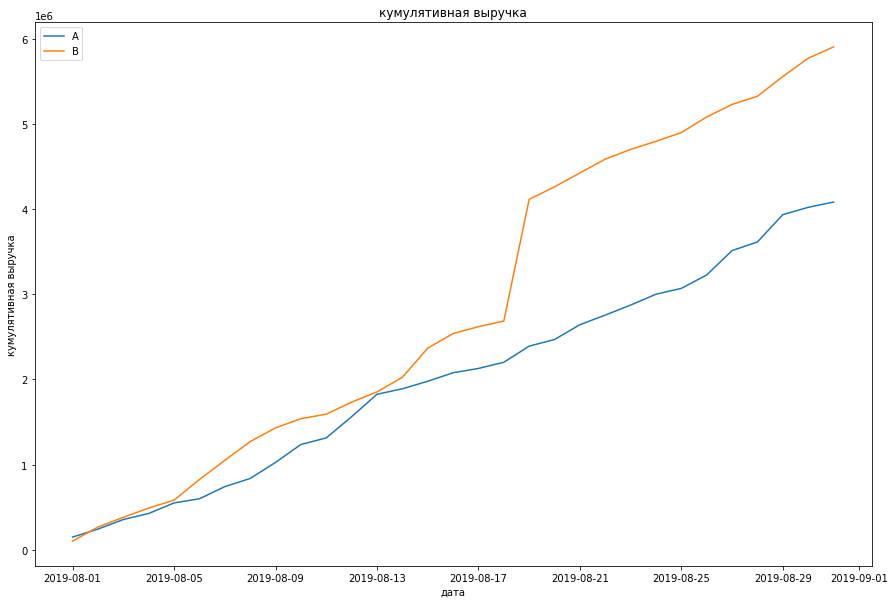

In [20]:
# строим график кумулятивной выручки группы А
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')

# строим график кумулятивной выручки группы B
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')
plt.title('кумулятивная выручка')
plt.xlabel('дата')
plt.ylabel('кумулятивная выручка')
plt.legend()
plt.show()

Кумулятивная выручка группы А стабильно растет без выраженных скачков, а вот в группе В наблюдается резкий скачок, после скачка графики идут параллельно. Очень вероятно, что после удаления выбросов мы увидим одинаковые графики. Выброс вероятно связан с крупными заказами или заказом, или с резким увеличением количества заказов (менее вероятно).

## Кумулятивный средний чек

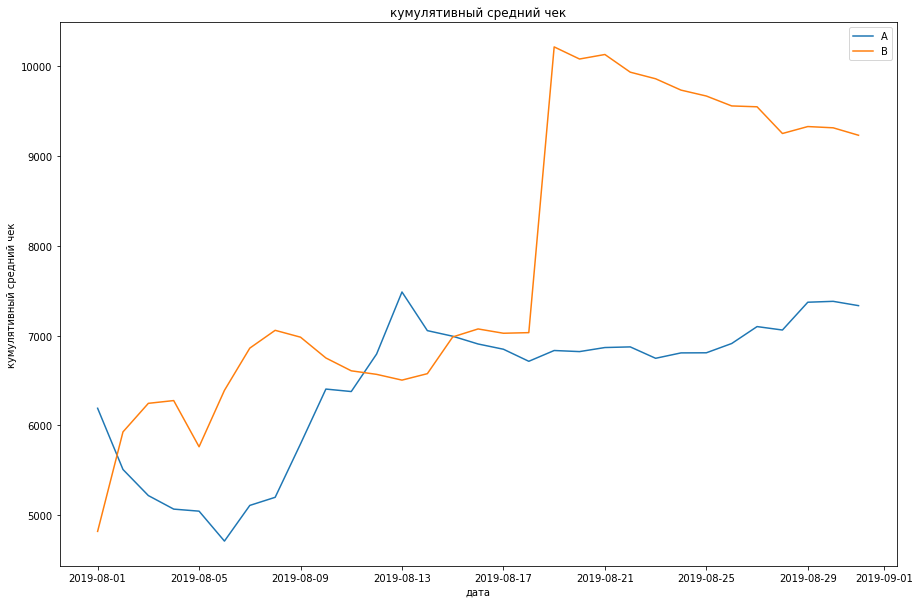

In [21]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')
plt.legend()
plt.title('кумулятивный средний чек')
plt.ylabel('кумулятивный средний чек')
plt.xlabel('дата')
plt.show()

Наблюдаем колебания среднего чека в начале наблюдения, затем видим резкий скачок в группе В, это подтверждает предположение об аномально крупных заказах. К концу наблюдения мы видим медленный рост среднего чека в группе А и снижение среднего чека в группе В. Не исключено, что после удаления выбросов мы все-таки увидим различия в группах.

## Относительное различие среднего чека

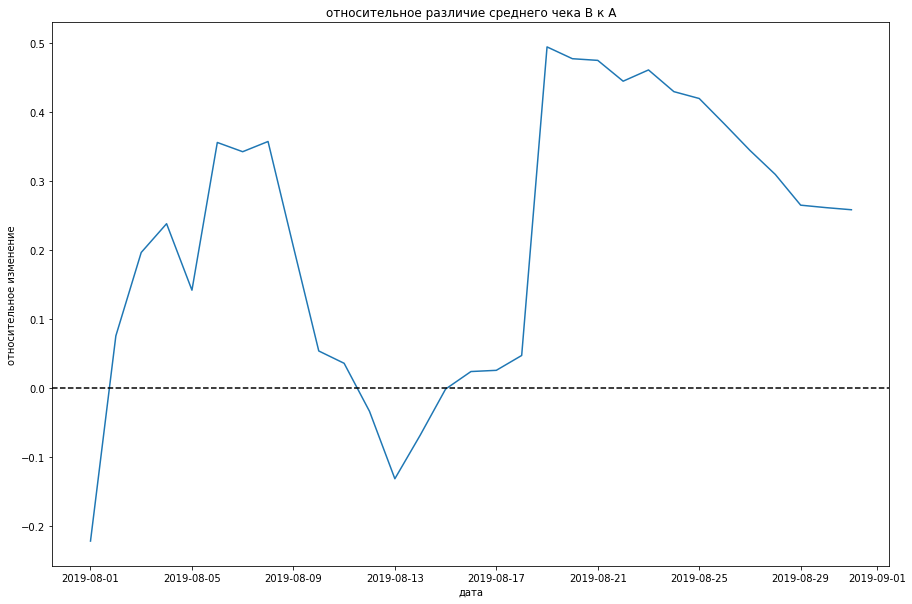

In [22]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeData['date'], (mergedCumulativeData['revenueB']/mergedCumulativeData['ordersB'])/(mergedCumulativeData['revenueA']/mergedCumulativeData['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('относительное различие среднего чека В к А')
plt.xlabel('дата')
plt.ylabel('относительное изменение')
plt.show()

график относительного различия кумулятивных средних чеков демонстрирует наличие выбросов

## Кумулятивное среднее количество заказов на посетителя

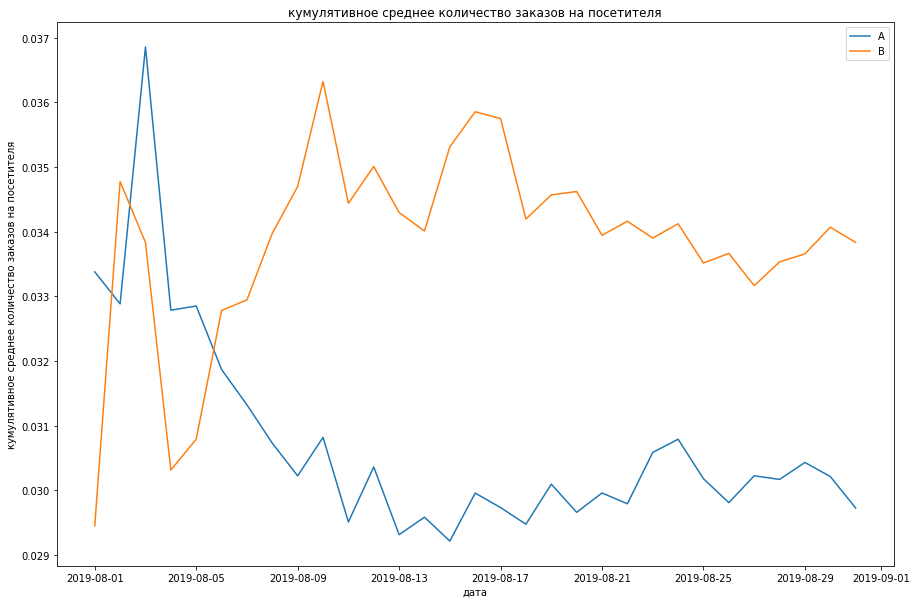

In [23]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders']/cumulativeDataA['visitors'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders']/cumulativeDataB['visitors'], label='B')
plt.title('кумулятивное среднее количество заказов на посетителя')
plt.legend()
plt.xlabel('дата')
plt.ylabel('кумулятивное среднее количество заказов на посетителя')
plt.show()

Видим серьезные колебания, затем рост в группе В и падение в группе А

## Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к группе А

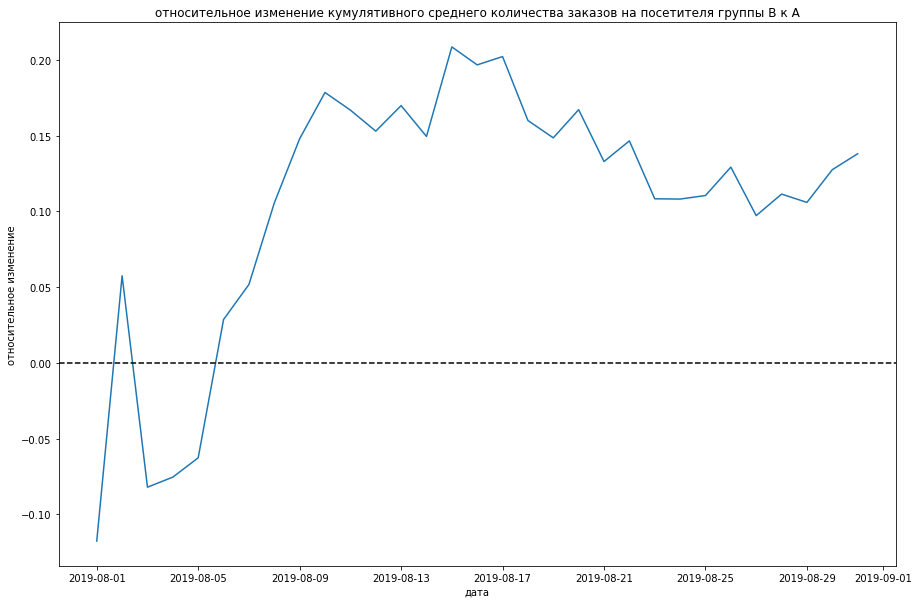

In [24]:
# cтроим отношение среднего количества заказов на посетителя
plt.plot(mergedCumulativeData['date'], (mergedCumulativeData['ordersB']/mergedCumulativeData['visitorsB'])/(mergedCumulativeData['ordersA']/mergedCumulativeData['visitorsA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('относительное изменение кумулятивного среднего количества заказов на посетителя группы В к А')
plt.xlabel('дата')
plt.ylabel('относительное изменение')
plt.show()

группа В явно лидирует

## Количество заказов по пользователям

In [25]:
ordersByBuyers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

ordersByBuyers.columns = ['buyerId', 'orders']

display(ordersByBuyers.sort_values(by='orders', ascending=False).head()) 

,buyerId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


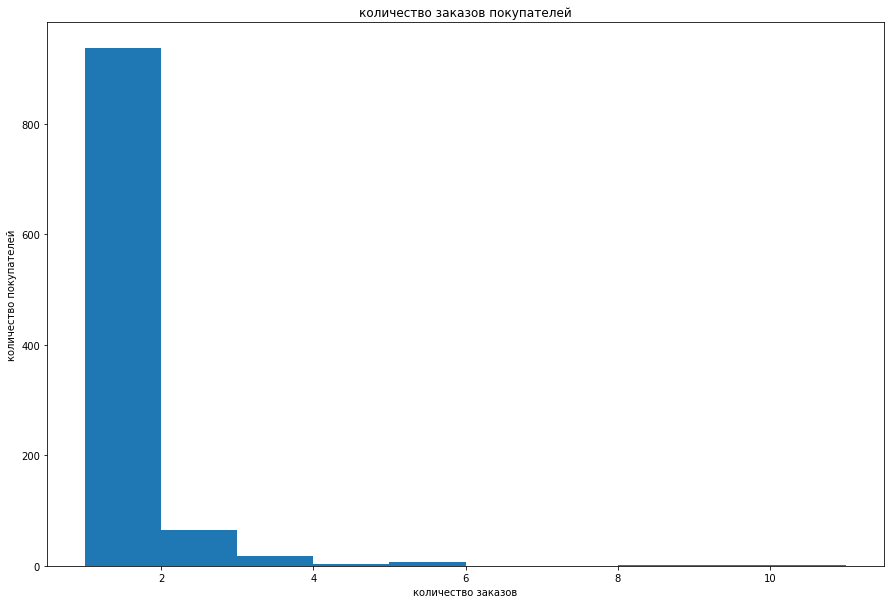

In [26]:
plt.hist(ordersByBuyers['orders'])
plt.title('количество заказов покупателей')
plt.xlabel('количество заказов')
plt.ylabel('количество покупателей')
plt.show()

большинство покупателей сделали один заказ, но встречаются и чрезвычайно активные, которые сделали по 8, 9, 11 заказов

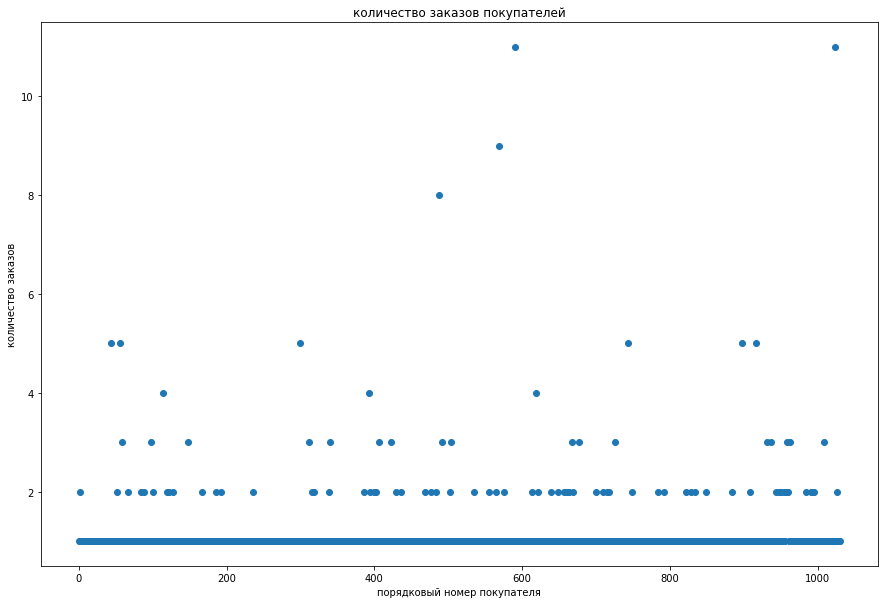

In [27]:
x_values = pd.Series(range(0,len(ordersByBuyers)))

plt.scatter(x_values, ordersByBuyers['orders']) 
plt.title('количество заказов покупателей')
plt.xlabel('порядковый номер покупателя')
plt.ylabel('количество заказов')
plt.show()

8, 9, 11 заказов - это явно выбросы, посмотрим где находятся перцентили

## Перцентили количества заказов, аномальные покупатели

In [28]:
print(np.percentile(ordersByBuyers['orders'], [95, 99]))

[2. 4.]


95% покупателей сделали не более 2-х заказов, а 99% не более 4-х. Будем считать аномальными покупателей сделавших более 3-х заказов (покупателей, сделавших 4 заказа меньше, чем покупателей сделавших 5 заказов)

## Стоимость заказов по пользователям

In [29]:
display(orders[['revenue']].sort_values(by='revenue', ascending=False).head(10)) 

,revenue
425,1294500
1196,202740
858,93940
1136,92550
744,86620
682,78990
662,78990
743,67990
1103,66350
1099,65710


Первые два значения сильно выделяются, затем идет постепенный спад, установим границу 100тыс и построим гистограмму

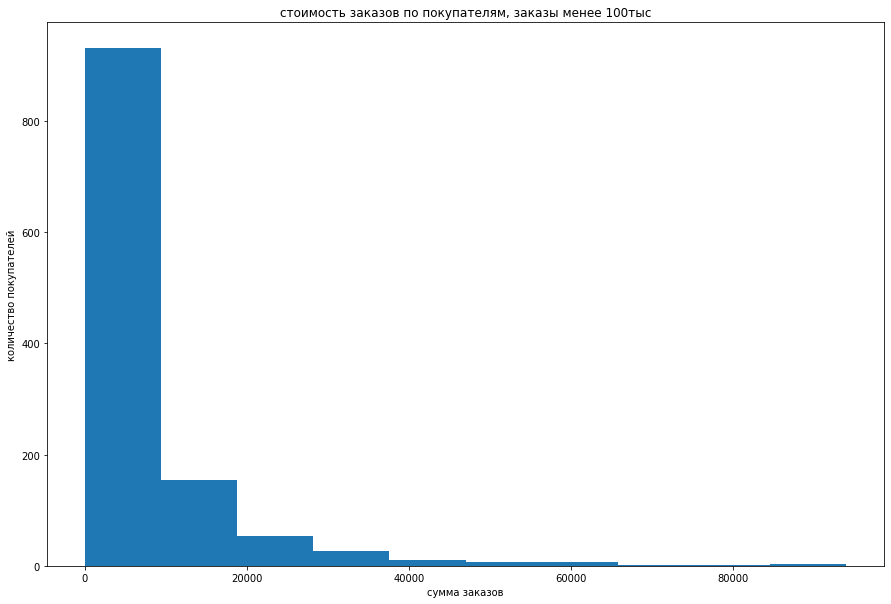

In [30]:
plt.hist(orders[orders['revenue'] < 100000]['revenue']) 
plt.title('стоимость заказов по покупателям, заказы менее 100тыс')
plt.xlabel('сумма заказов')
plt.ylabel('количество покупателей')
plt.show()

теперь построим точечный график

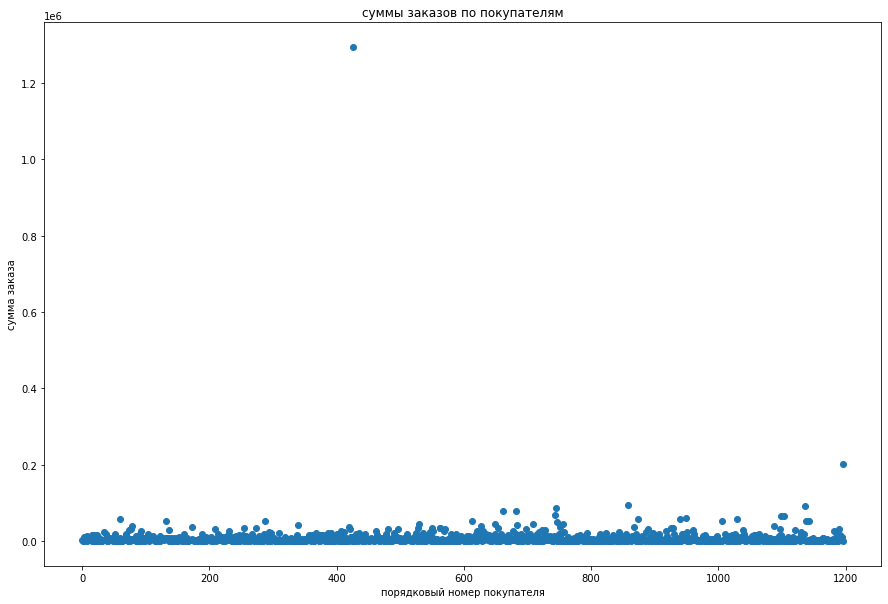

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('суммы заказов по покупателям')
plt.xlabel('порядковый номер покупателя')
plt.ylabel('сумма заказа')
plt.show()

на точечном графике хорошо видны два аномальных значения, один из низ просто затмил все остальные, построим график без них, ограничимся суммой заказа в 100тыс

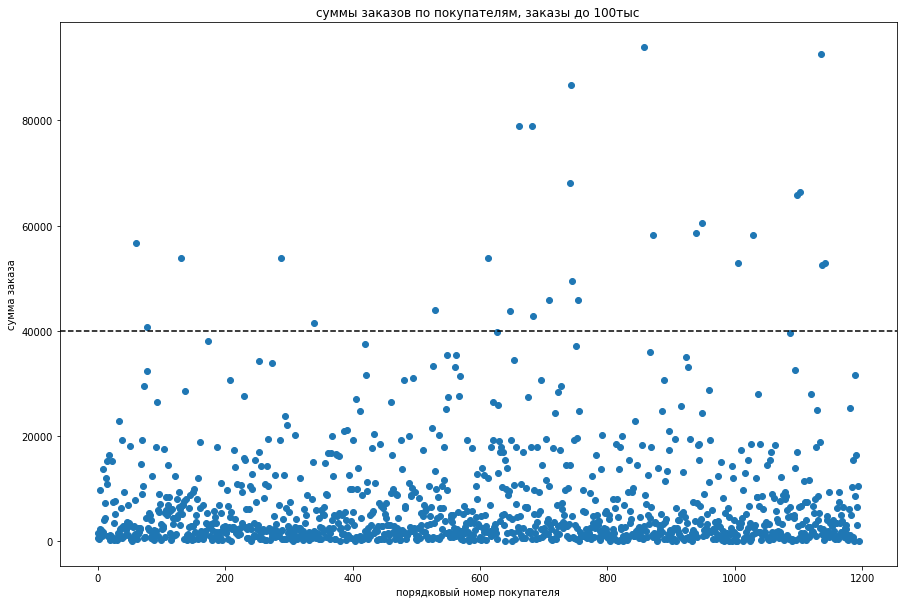

In [32]:
# точечный график для стоимостей заказа меньше 100 тыс
x_values = pd.Series(range(0,len(orders[orders['revenue'] < 100000]['revenue'])))
plt.scatter(x_values, orders[orders['revenue'] < 100000]['revenue'])
plt.axhline(y=40000, color='black', linestyle='--')
plt.title('суммы заказов по покупателям, заказы до 100тыс')
plt.xlabel('порядковый номер покупателя')
plt.ylabel('сумма заказа')
plt.show()

## Перцентили стоимости заказов, аномальные покупатели

In [33]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Стоимость заказа в 95% случаях не превышает 28000, а в 99% не превышает 58233.2, можно принять границу в этих пределах, но стоимость заказа ниже 100тыс убывает постепенно, а два первых по величине идут с большим отрывом, можно два заказа принять за аномальные, остальные оставить.

Из графиков мы видим, что количество заказов на покупателя и средний чек распределены не нормально, поэтому для оценки статистической значимости различий между группами применим непараметрический критерий Манна-Уитни, проведем четыре теста: для среднего количества заказов и для среднего чека на "сырых" и "очищенных" данных.

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным

Подготовим таблицы с ежедневным количеством посетителей, заказов и выручкой (без накопления) с разбивкой по группам

In [34]:
# количество посетителей по дням группа А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# количество посетителей по дням группа В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# объединенная таблица посетителей по дням
visitorsDaily = visitorsADaily.merge(visitorsBDaily, left_on='date', right_on='date', how='left')

display(visitorsDaily.head())

,date,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [35]:
# количество заказов и сумма выручки по дням группа А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# количество заказов и сумма выручки по дням группа В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# объединенная таблица заказов и выручки по дням
ordersDaily = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')

display(ordersDaily.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB
0,2019-08-01,24,148579,21,101217
1,2019-08-02,20,93822,24,165531
2,2019-08-03,24,112473,16,114248
3,2019-08-04,16,70825,17,108571
4,2019-08-05,25,124218,23,92428


In [36]:
# объединенные визиты и заказы - ежедневные данные о визитах и заказах с разбивкой по группам
data = ordersDaily.merge(visitorsDaily, left_on='date', right_on='date', how='left')

In [37]:
display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,24,148579,21,101217,719,713
1,2019-08-02,20,93822,24,165531,619,581
2,2019-08-03,24,112473,16,114248,507,509
3,2019-08-04,16,70825,17,108571,717,770
4,2019-08-05,25,124218,23,92428,756,707


In [38]:
# покупатели, совершавшие заказы и количество их заказов, группа А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# покупатели, совершавшие заказы и количество их заказов, группа В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [39]:
# количества заказов каждого покуптеля и нули для тех посетителей, которые не совершали покупки, группа А
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

# количества заказов каждого покуптеля и нули для тех посетителей, которые не совершали покупки, группа В
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

<b>Проверяем различие выборок среднего количества заказов на посетителя в группах А и В на "сырых" данных:</b>

- нулевая гипотеза: среднее количество заказов на покупателя в группах не отличается
- альтернативная гипотеза: среднее количество заказов в группах различно

In [40]:
print('p-value:')
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print()
print('относительная разница между количеством заказов на посетителя по "сырым" данным')
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value:
0.017

относительная разница между количеством заказов на посетителя по "сырым" данным
0.138


По "сырым" данным нулевую гипотезу отвергаем - различие в среднем количестве заказов на посетителя в группах есть (p-value = 0.017 < 0.05), при этом среднее количество заказов на посетителя группы В выше на 13.8%

## Статистическая значимость различий в среднем чеке между группами по "сырым" данным

<b>Проверяем различие выборок среднего чека в группах А и В на "сырых" данных:</b>

- нулевая гипотеза: средний чек в группах не отличается
- альтернативная гипотеза: средний чек в группах различен

In [41]:
print('p-value:')
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print()
print('относительная разница между средними чеками по "сырым" данным:')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:
0.729

относительная разница между средними чеками по "сырым" данным:
0.259


p-value = 0.729 > 0.05 нулевую гипотезу не отвергаем, различия между группами в среднем чеке нет, при этом средний чек группы В выше на 25,9% Требуется проверка очищенных данных

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным

Выделим аномальных покупателей, совершивших более 3-х заказов и с заказами более 100тыс

In [42]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 100000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('количество аномальных покупателей', abnormalUsers.shape[0])

количество аномальных покупателей 11


количество уникальных покупателей в каждой группе больше 500, таким образом, потери пользователей при очистке составили около 1%

подготовим выборки к тесту - уберем аномальные данные

In [43]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<b>Проверяем различие выборок среднего количества заказов на посетителя в группах А и В на "очищенных" данных:</b>

- нулевая гипотеза: среднее количество заказов на покупателя в группах не отличается
- альтернативная гипотеза: среднее количество заказов в группах различно

In [44]:
print('p-value:')
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print()
print('относительная разница между количеством заказов на посетителя по "очищенным" данным')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value:
0.018

относительная разница между количеством заказов на посетителя по "очищенным" данным
0.143


Результаты по среднему количеству заказов на посетителя почти не изменились, очистка данных здесь не повлияла на результаты, нулевая гипотеза отвергается, разница в группах есть (p-value = 0.018 < 0.05), среднее количество заказов на посетителя группы В отностильно группы А немного выросло с 13.8% до 14.3%

## Статистическая значимость различий в среднем чеке между группами по "очищенным" данным

<b>Проверяем различие выборок среднего чека в группах А и В на "очищенных" данных:</b>

- нулевая гипотеза: средний чек в группах не отличается
- альтернативная гипотеза: средний чек в группах различен

In [45]:
print('p-value:')
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print()
print('относительная разница между средними чеками по "очищенным" данным:')
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value:
0.823

относительная разница между средними чеками по "очищенным" данным:
-0.091


Вывод про средний чек тоже остался без изменений, нулевая гипотеза не отвергается, различия в среднем чеке нет, значение p-value стало еще больше, а средний чек группы В из победителя стал побежденным (был выше на 25%, стал ниже на 9%, т.е. аномальный чек больше 1млн вероятно в группе В)

## Выводы

Мы провели анализ А/В-теста: изучили среднее количество заказов на посетителя и среднюю сумму заказа в двух группах. Анализ провели на "сырых" данных и на "очищеных" (удаление выбросов не более 5%)

При установленном уровне статистической значимости 5% и использовании критерия Манна-Уитни мы получили следующие результаты:

- среднее количество заказов на посетителя в группе В выше, чем в группе А
- средний чек в группах не отличается

Рекомендуется остановить тест, признать группу В победившей.

Комментарий: при уровне статистической значимости 1% разницы в среднем количестве заказов на посетителя мы не увидим, и можно зафиксировать отсутствие различий между группами.